In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels = np.load('../data/train_labels.npy')
df = pd.read_csv('../data/processed_train.csv')
df['label'] = labels
df

,beat,stft0_0,stft0_1,stft0_2,stft0_3,stft0_4,stft0_5,stft0_6,stft0_7,stft0_8,...,mean_rms_p,std_rms_p,mean_centroid_p,std_centroid_p,mean_flatness_p,std_flatness_p,beat_p,zero crossing_p,corr,label
0,123.046875,0.929194,0.999243,0.998013,0.997342,0.996748,0.998839,0.989594,0.999178,0.987412,...,0.071442,0.051302,1871.640046,1148.728532,0.022756,0.049181,123.046875,0.076300,37.512499,0
1,95.703125,0.935299,0.994673,0.989620,0.938694,0.993156,0.997871,0.998079,0.947577,0.972461,...,0.126519,0.077212,2785.941910,1201.738400,0.056310,0.073378,95.703125,0.150361,65.924663,9
2,151.999081,0.820908,0.915739,0.997154,0.815205,0.995722,0.995221,0.995340,0.996534,0.963727,...,0.114169,0.057088,2848.567625,967.264776,0.061050,0.064408,151.999081,0.124812,19.886538,6
3,161.499023,0.907249,0.992721,0.963728,0.996987,0.996147,0.999030,0.997560,0.994780,0.994807,...,0.089692,0.035133,2981.632092,1332.937979,0.041235,0.049923,161.499023,0.190382,13.984885,4
4,95.703125,0.000000,0.999734,0.999762,0.999727,0.999703,0.994545,0.999216,0.998722,0.999440,...,0.015862,0.014453,2090.441539,899.210236,0.041804,0.052000,95.703125,0.111381,88.090674,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19904,198.768029,0.950205,0.997078,0.996853,0.997088,0.997128,0.996669,0.996900,0.989113,0.985274,...,0.080916,0.060029,1554.397966,851.728047,0.017596,0.036795,99.384014,0.078106,26.555463,4
19905,123.046875,0.959366,0.942796,0.999803,0.990381,1.000000,0.994947,0.981478,0.812486,0.666122,...,0.048055,0.033859,2652.293989,982.139008,0.033334,0.035543,123.046875,0.136034,40.604446,1
19906,129.199219,0.892612,0.989999,0.998380,0.992014,0.886933,0.999580,0.999130,1.000000,0.995522,...,0.042406,0.036780,2498.945684,1114.243832,0.035421,0.052730,129.199219,0.121775,70.020325,7
19907,135.999178,0.670283,1.000000,0.998753,0.983286,0.767479,0.984950,0.988854,0.990933,0.966689,...,0.074978,0.083560,3118.513420,2228.462041,0.016428,0.021687,135.999178,0.209729,74.003636,0


In [31]:
import seaborn as sns

def savefeaturefigs(col):
    fig, ax = plt.subplots(2, 1,  sharex='col', figsize = (20,10),dpi = 80)
    sns.boxplot(ax = ax[0], x = df['label'], y = df[col] , width = 0.4);
    sns.boxplot(ax = ax[1], x = df['label'], y = df[col] , width = 0.4, showfliers = False);
    col = col.title()
    ax[0].set_title(col)
    fn = col.replace(' ','_')
    fig.savefig('../figures/%s.png'%col)

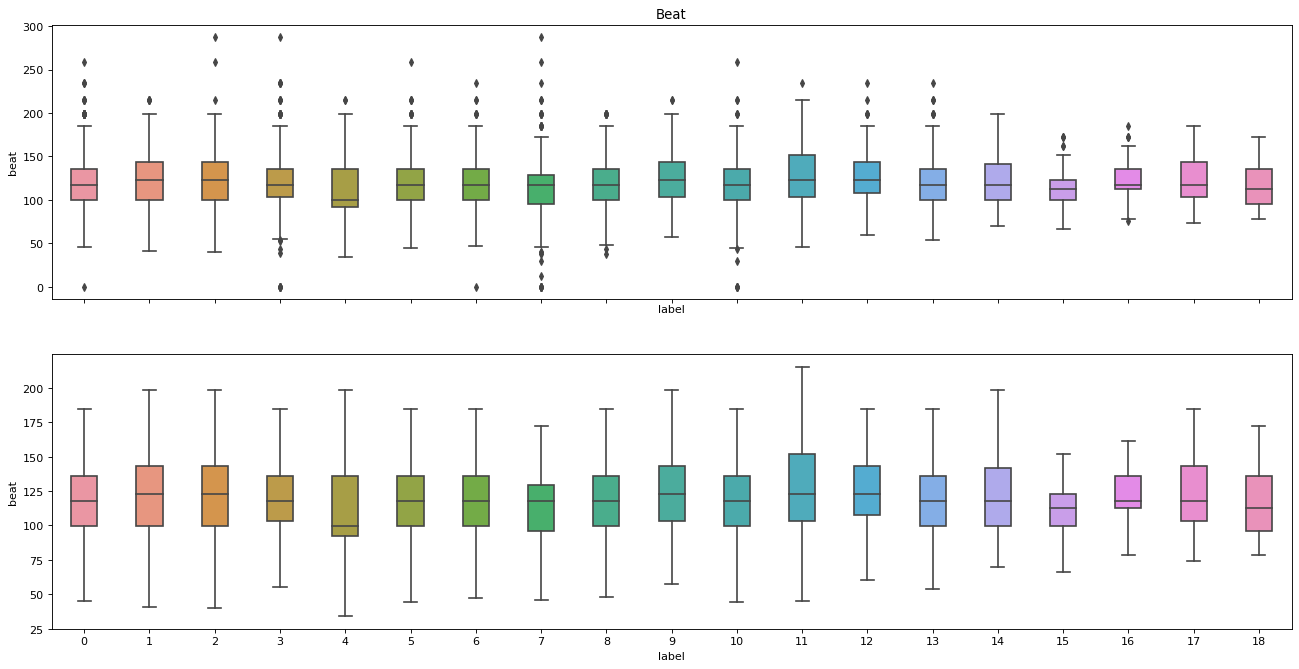

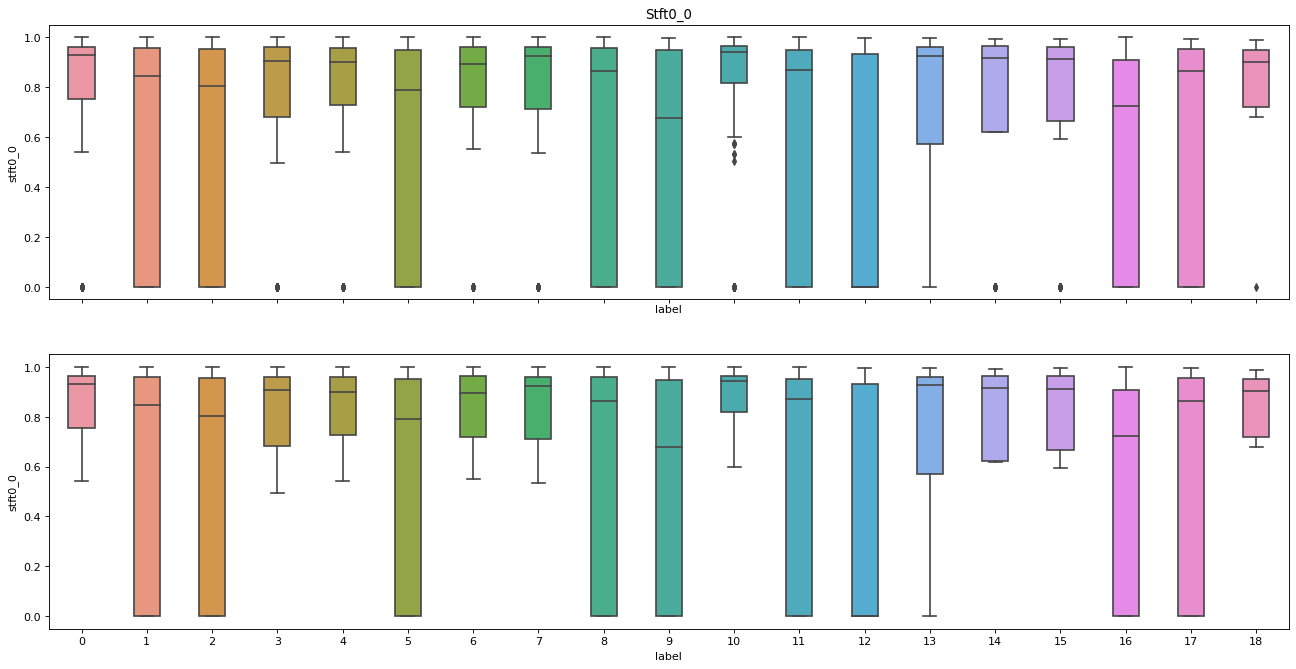

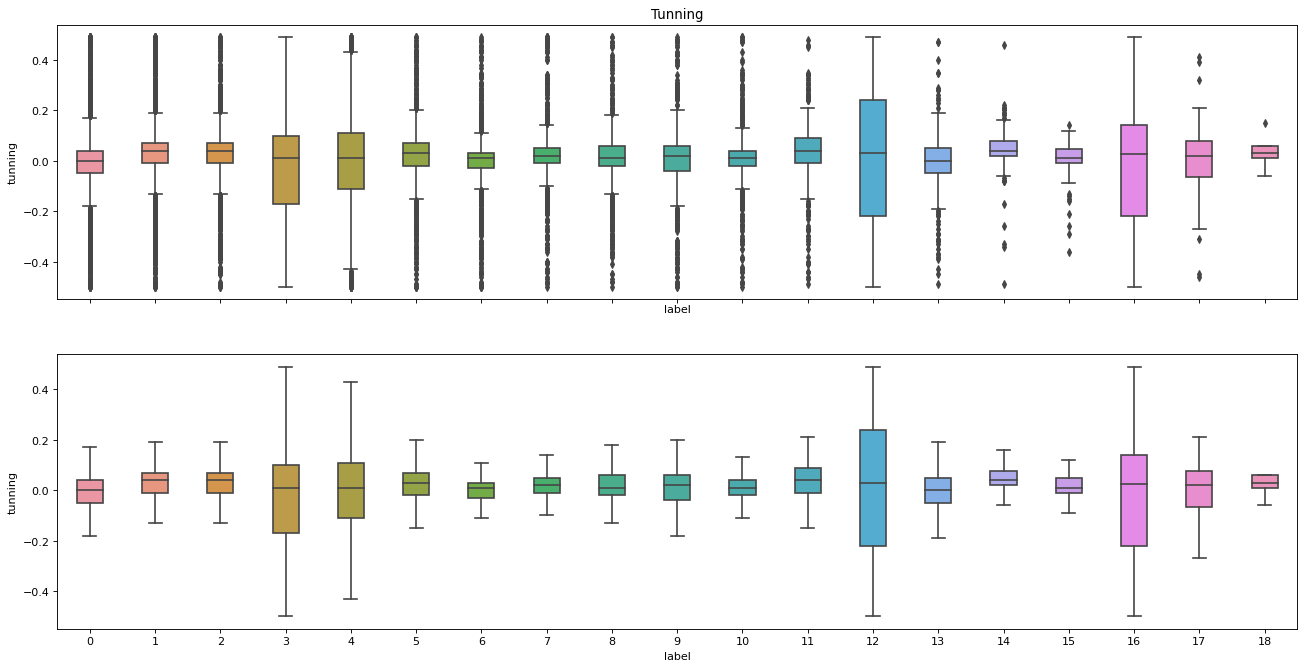

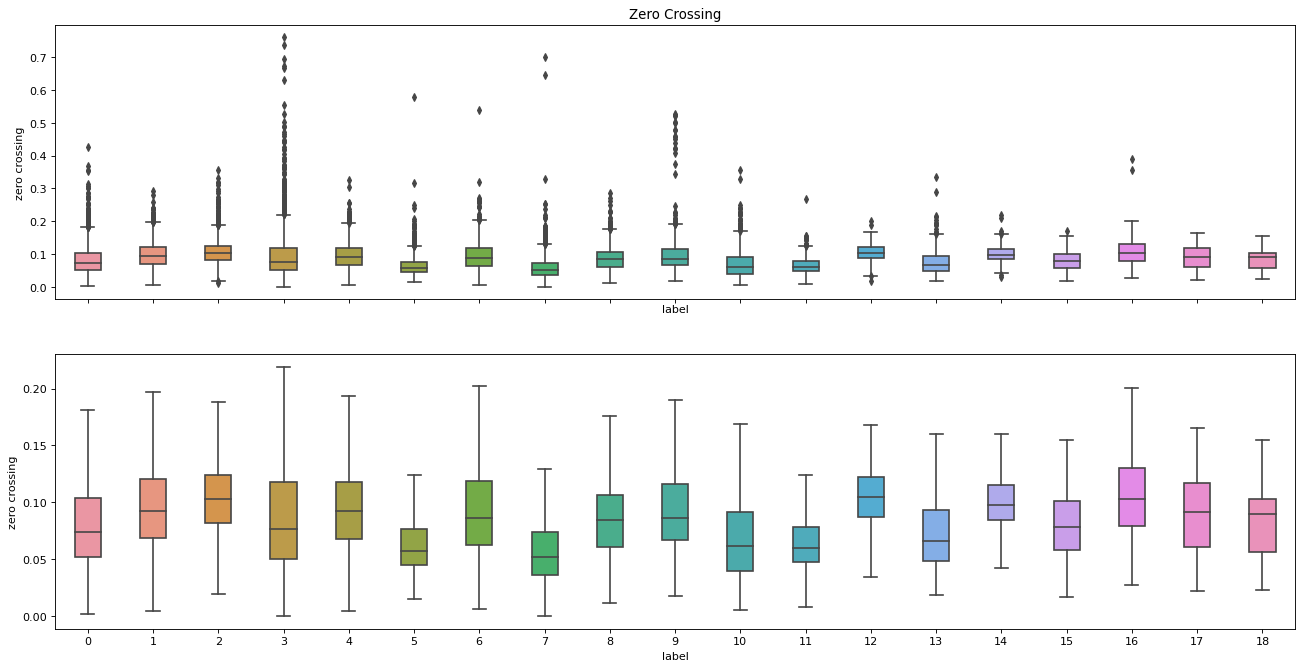

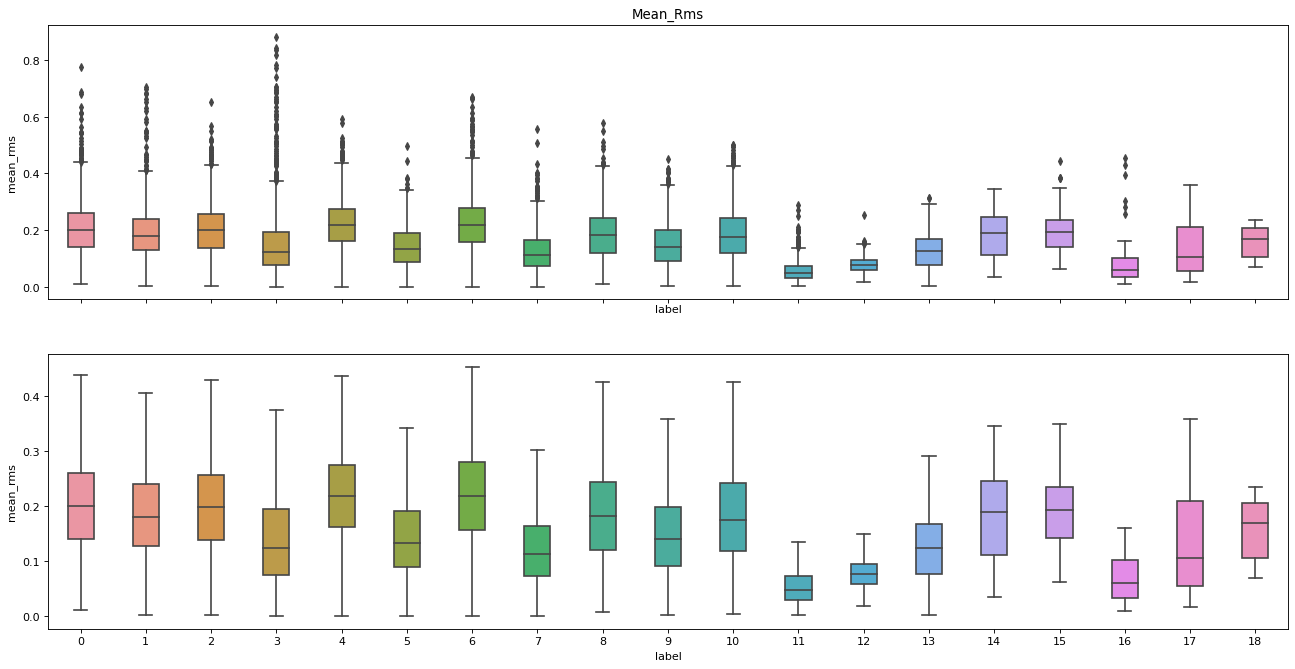

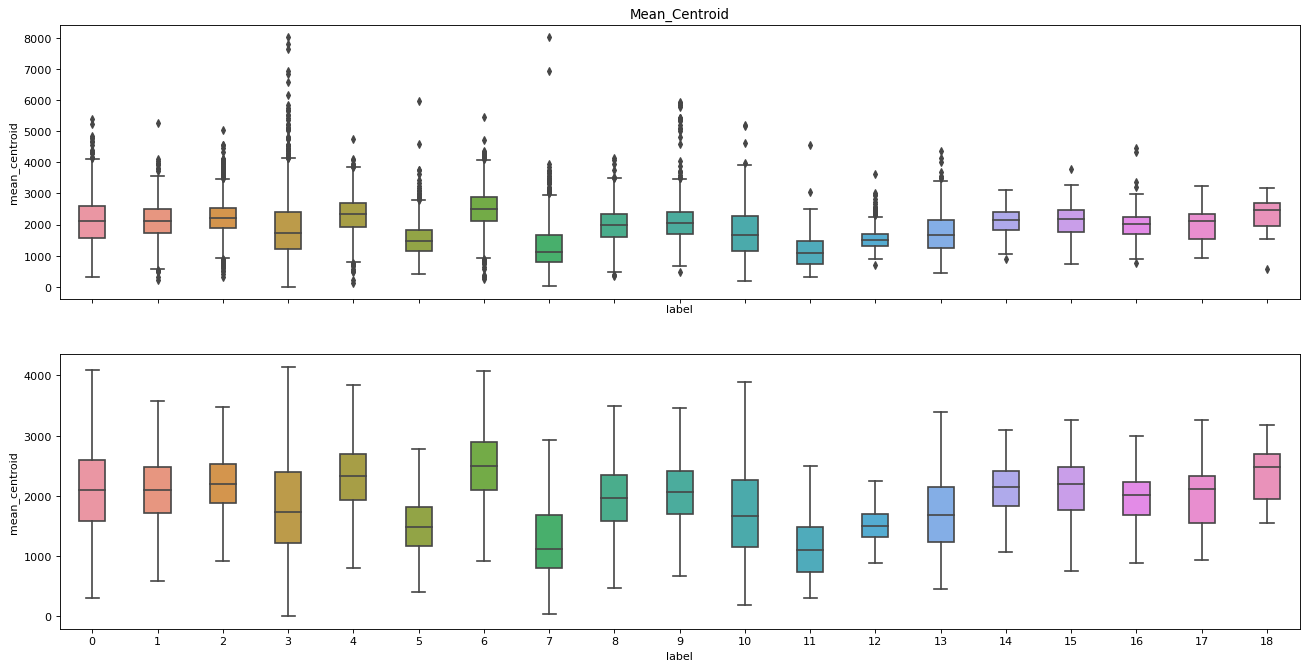

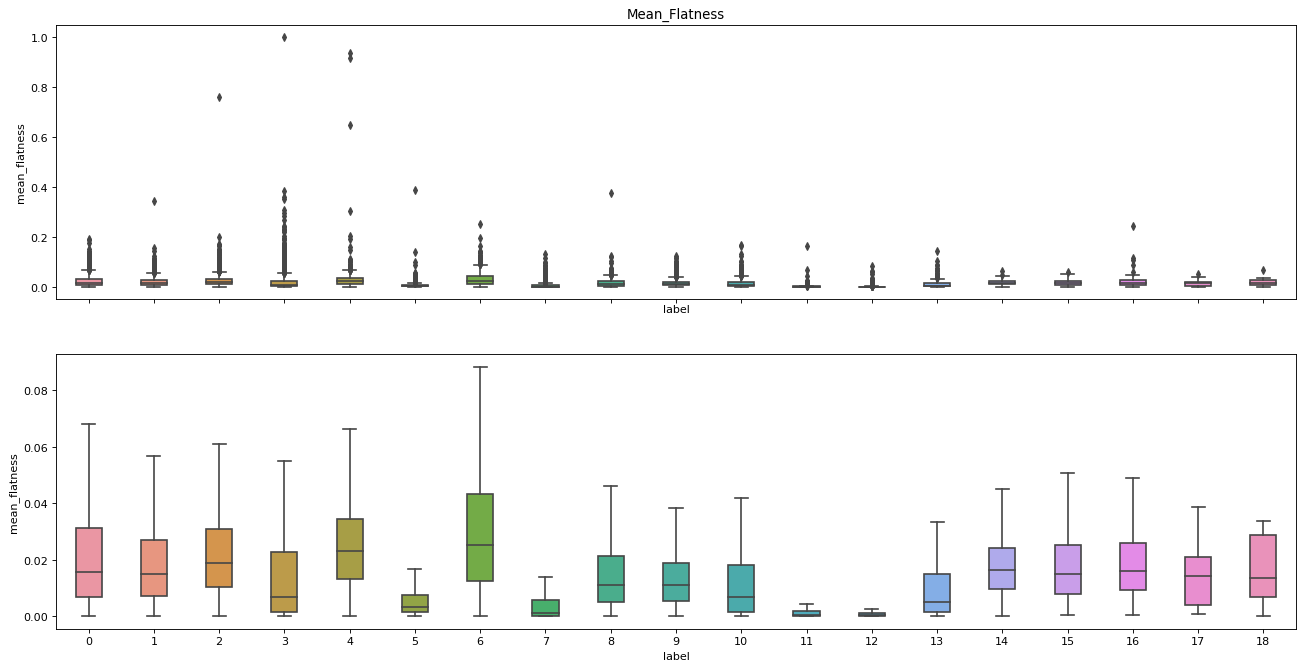

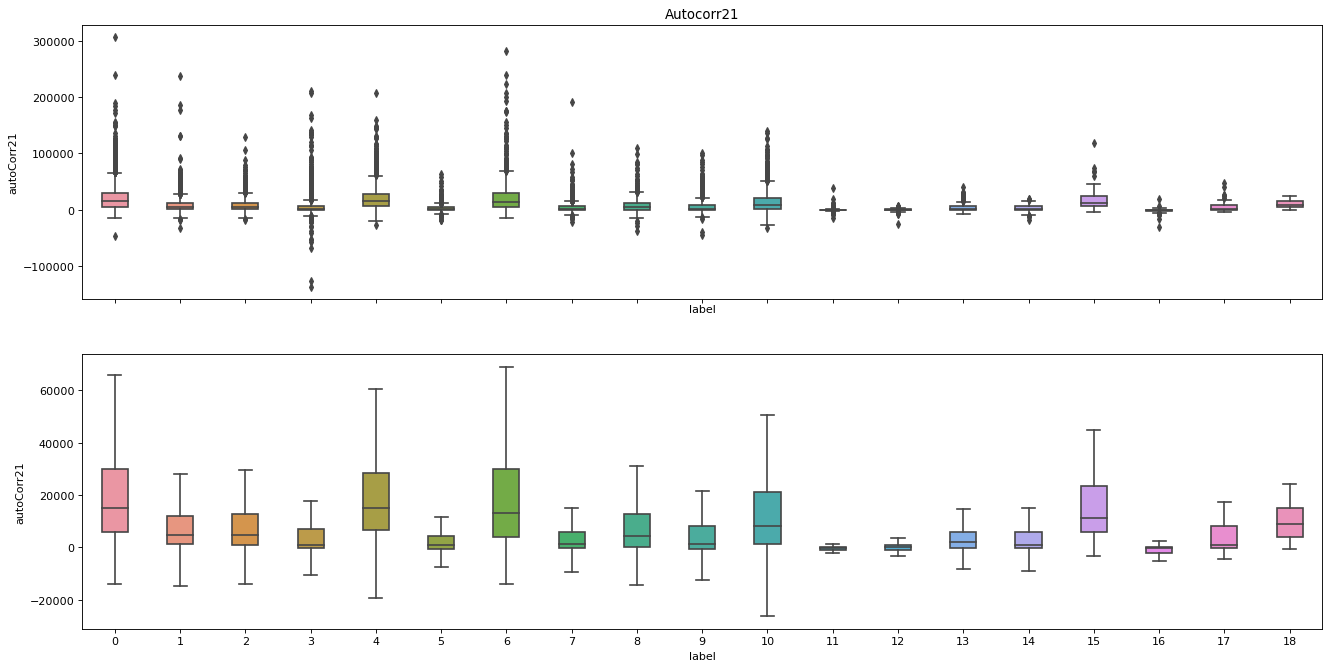

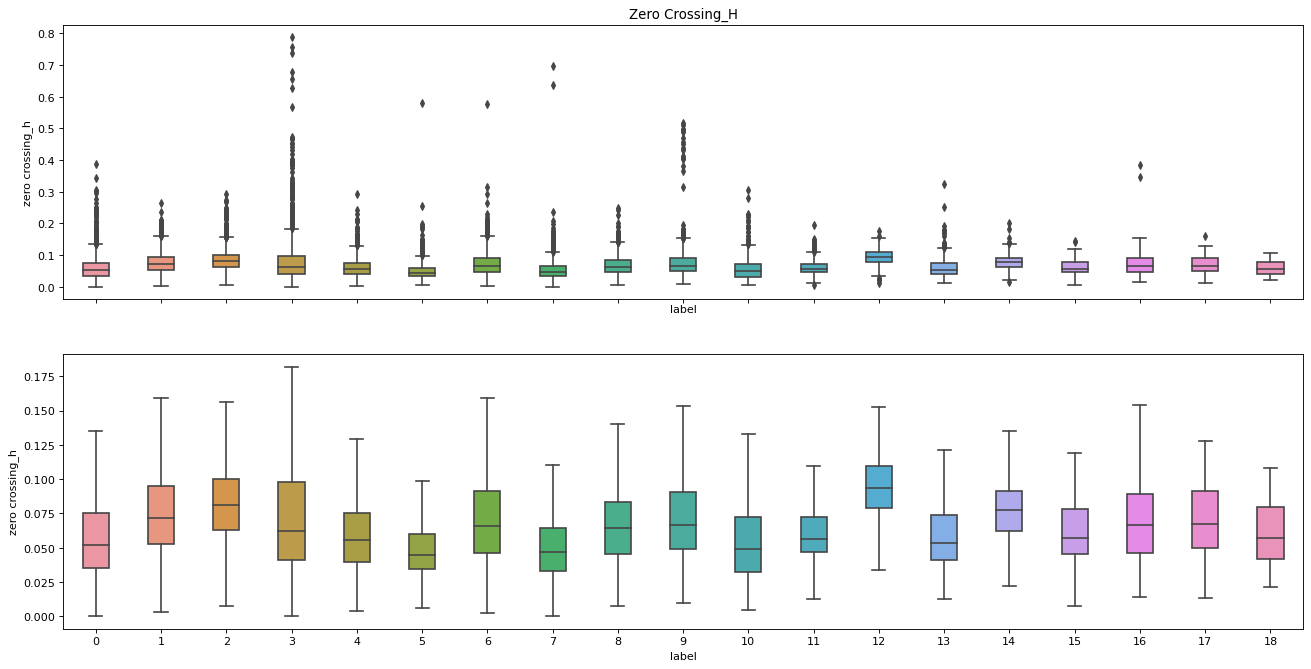

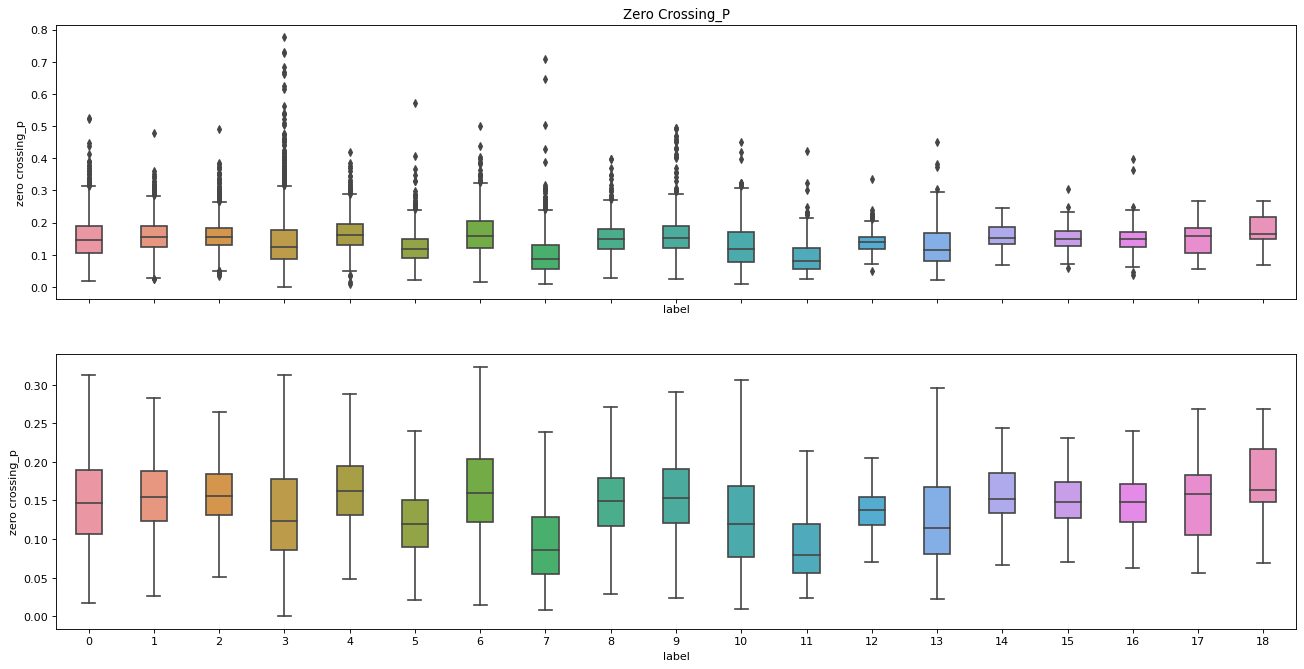

In [32]:
cols =  ['beat', 'stft0_0', 'tunning', 'zero crossing', 'mean_rms', 'mean_centroid', 'mean_flatness', 'autoCorr21', 'zero crossing_h', 'zero crossing_p']

for c in cols:
    savefeaturefigs(c)

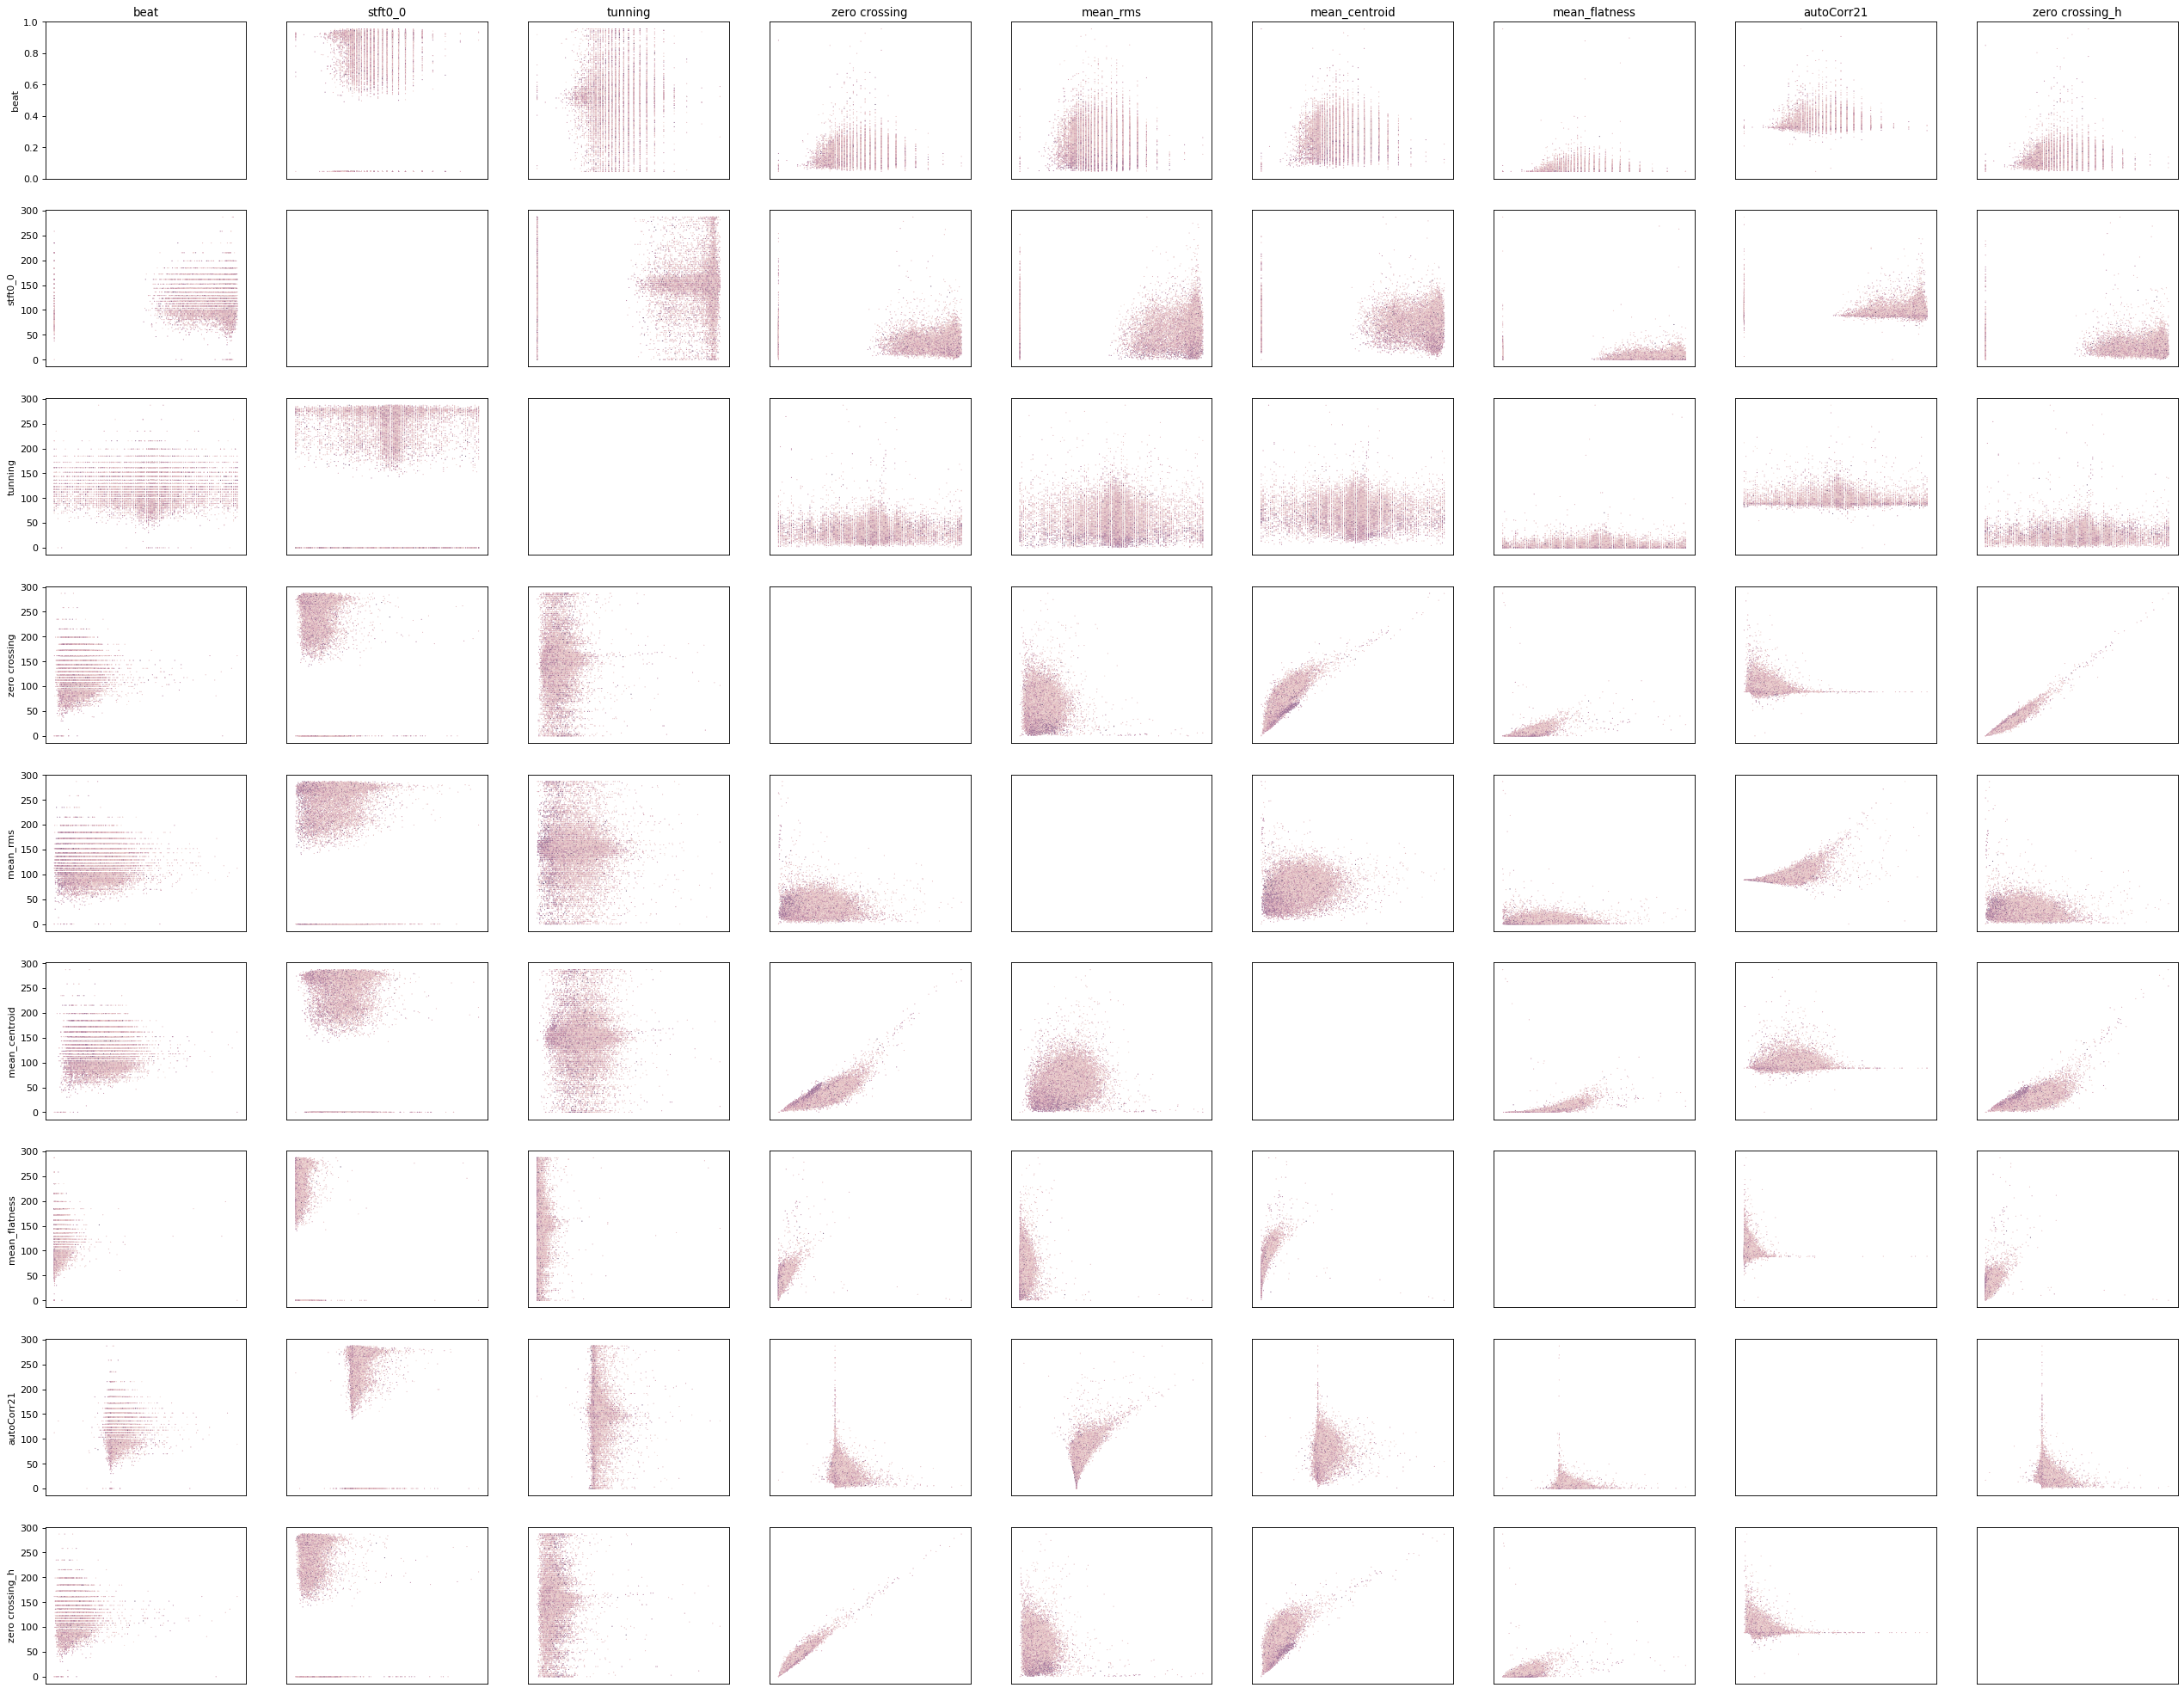

In [40]:
import matplotlib

checkbetween = ['beat', 'stft0_0', 'tunning', 'zero crossing', 'mean_rms', 'mean_centroid', 'mean_flatness', 'autoCorr21', 'zero crossing_h']
fig, ax = plt.subplots(9, 9,figsize = (40,32),dpi = 80)
for i in range(9):
    for j in range(9):
        ax[i][j].get_xaxis().set_visible(False)
        if i == 0:
            ax[i][j].set_title(checkbetween[j])
        if j == 0:
            ax[i][j].set_ylabel(checkbetween[i])
        else:
            ax[i][j].get_yaxis().set_visible(False)
        if i == j:
            continue
        sns.scatterplot(ax = ax[i][j], x = checkbetween[i], y = checkbetween[j], data=df, hue='label', s=1, legend = False)
fig.savefig('../figures/features_by_labels.png')